In [197]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv(r'..\data\raw\creditcard.csv')

In [199]:
df.shape

(284807, 31)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [201]:
df["Class"].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [202]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [203]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [204]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

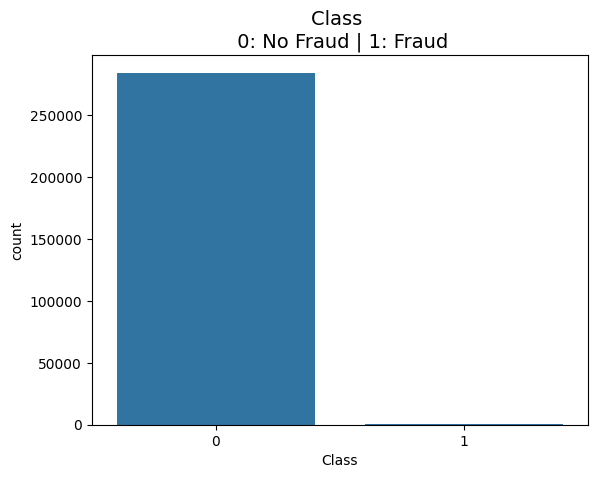

In [205]:
sns.countplot(data=df,x='Class')
plt.title('Class \n 0: No Fraud | 1: Fraud', fontsize=14);

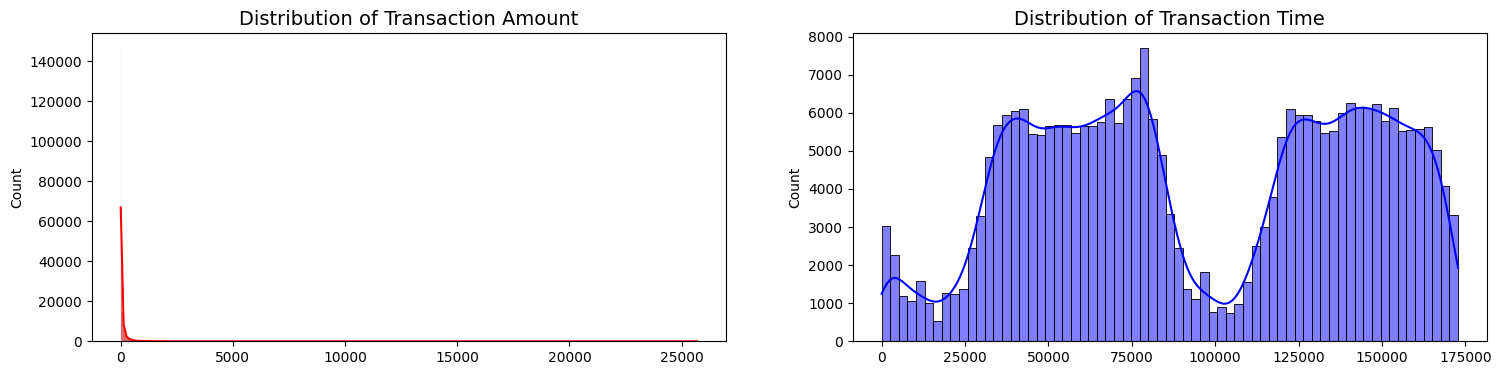

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.histplot(df['Amount'].values, ax=ax[0], color='r',kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.histplot(df['Time'].values, ax=ax[1], color='b',kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14);

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns='Class')
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by='VIF', ascending=False).head(10)

,Variable,VIF
30,Amount,12.116701
0,const,10.065370
3,V2,4.422390
8,V7,2.929040
6,V5,2.859316
21,V20,2.399180
1,Time,1.879865
4,V3,1.877342
2,V1,1.651908
7,V6,1.571530


In [208]:
X = df.drop(columns=['V9','V23','V21','V25','V27','V13','V22','V24','V28','Class'])
y = df['Class']

In [ ]:
X['Time'] = np.log1p(X['Time'])
X['Time'] = np.log1p(X['Time'])

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [183]:
# from imblearn.over_sampling import RandomOverSampler

# smote_enn = RandomOverSampler(random_state=42)
# X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [184]:
lr = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob > 0.8).astype(int) 

f1_scores = cross_val_score(lr, X_train, y_train, cv=skf, scoring='f1')

print(f"F1-score promedio en validación cruzada: {f1_scores.mean():.4f}")
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

F1-score promedio en validación cruzada: 0.7239
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.43      0.56        98

    accuracy                           1.00     56962
   macro avg       0.91      0.71      0.78     56962
weighted avg       1.00      1.00      1.00     56962

[[56855     9]
 [   56    42]]


In [119]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(class_weight={0:1, 1:6})
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# rf.fit(X_train, y_train)

# y_prob = rf.predict_proba(X_test)[:, 1]
# y_pred_rf = (y_prob > 0.6).astype(int) 

# f1_scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring='f1')

# print(f"F1-score promedio en validación cruzada: {f1_scores.mean():.4f}")
# # Evaluar el modelo
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))

In [185]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Definir modelo XGBoost con ratio ajustado
model = XGBClassifier(
    scale_pos_weight=ratio*1.3,    
    max_depth=4,      
    learning_rate=0.1,
    n_estimators=300, 
    subsample=0.8, colsample_bytree=0.8,
    reg_alpha=0.5, reg_lambda=1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Validación cruzada con predicciones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X_test, y_test, cv=cv, method='predict_proba')[:, 1]

# Ajuste de umbral para optimizar F1-score o precision
threshold = 0.35  # puedes ajustar esto
y_pred_bin = (y_pred_cv >= threshold).astype(int)

# Reporte
print("F1-score promedio:", f1_score(y_test, y_pred_bin))
print("Classification Report:")
print(classification_report(y_test, y_pred_bin, digits=4))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_bin))

F1-score promedio: 0.8229166666666666
Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8404    0.8061    0.8229        98

    accuracy                         0.9994     56962
   macro avg     0.9200    0.9029    0.9113     56962
weighted avg     0.9994    0.9994    0.9994     56962

Matriz de confusión:
[[56849    15]
 [   19    79]]


F1-score promedio: 0.8192771084337349
Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56656
           1     0.8947    0.7556    0.8193        90

    accuracy                         0.9995     56746
   macro avg     0.9472    0.8777    0.9095     56746
weighted avg     0.9994    0.9995    0.9994     56746

Matriz de confusión:
[[56648     8]
 [   22    68]]

 F1-score promedio: 0.8290155440414507
Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8421    0.8163    0.8290        98

    accuracy                         0.9994     56962
   macro avg     0.9209    0.9080    0.9144     56962
weighted avg     0.9994    0.9994    0.9994     56962

Matriz de confusión:
[[56849    15]
 [   18    80]] (estee s el mejor, normalizando time y dejadno todas las variables)

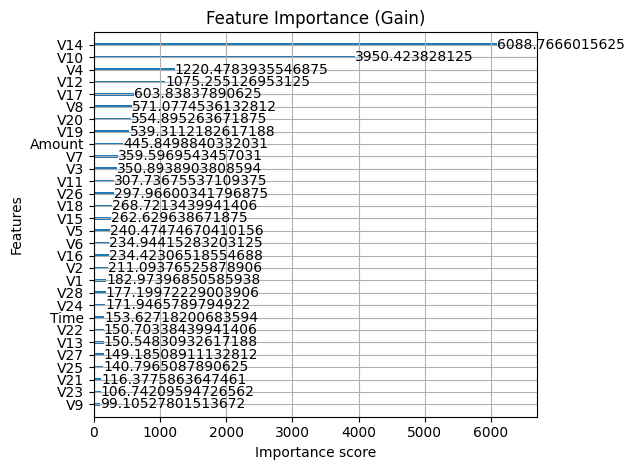

In [168]:
from xgboost import plot_importance

model.fit(X_train,y_train)

plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()

In [ ]:
['V9','V23','V21','V25','V27','V13','V22','V24','V28','Class']

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_prob_dt > 0.5).astype(int)

print("\n[DecisionTreeClassifier]")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


[DecisionTreeClassifier]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.86      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

[[55339  1317]
 [   13    77]]


In [20]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
brf.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_br = cross_val_predict(brf, X_test, y_test, cv=cv, method='predict_proba')[:, 1]

# Ajuste de umbral para optimizar F1-score o precision
threshold = 0.70  # puedes ajustar esto
y_pred_bin = (y_pred_br >= threshold).astype(int)

# Reporte
print("F1-score promedio:", f1_score(y_test, y_pred_bin))
print("Classification Report:")
print(classification_report(y_test, y_pred_bin, digits=4))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_bin))

KeyboardInterrupt: 